# tvmarketing dataset

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict
import operator

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


/kaggle/input/tvmarketingcsv/Case_study_Simple_Linear_Regression.ipynb
/kaggle/input/tvmarketingcsv/.gitignore
/kaggle/input/tvmarketingcsv/README.md
/kaggle/input/tvmarketingcsv/tvmarketing.csv


In [2]:
import keras 
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.callbacks import EarlyStopping
import tensorflow as tf

In [7]:
# Reading csv file from github repo
advertising = pd.read_csv('../input/tvmarketingcsv/tvmarketing.csv')
advertising.head()


,TV,Sales
0,230.1,22.1
1,44.5,10.4
2,17.2,9.3
3,151.5,18.5
4,180.8,12.9


In [8]:
# Display the last 5 rows
advertising.tail()

,TV,Sales
195,38.2,7.6
196,94.2,9.7
197,177.0,12.8
198,283.6,25.5
199,232.1,13.4


In [9]:
advertising.describe().T

,count,mean,std,min,25%,50%,75%,max
TV,200.0,147.0425,85.854236,0.7,74.375,149.75,218.825,296.4
Sales,200.0,14.0225,5.217457,1.6,10.375,12.90,17.400,27.0


In [10]:
advertising.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   TV      200 non-null    float64
 1   Sales   200 non-null    float64
dtypes: float64(2)
memory usage: 3.2 KB


In [11]:
advertising.shape

(200, 2)

In [12]:
advertising.isna().sum()

TV       0
Sales    0
dtype: int64

In [13]:
# Extract 2 columns 'T_degC','Salnty' for pure and better showing
advertising_df = advertising[['TV','Sales']]

# And called again
advertising_df.columns = ['Television ', 'Marketing Sales']

In [14]:
advertising_df

,Television,Marketing Sales
0,230.1,22.1
1,44.5,10.4
2,17.2,9.3
3,151.5,18.5
4,180.8,12.9
...,...,...
195,38.2,7.6
196,94.2,9.7
197,177.0,12.8
198,283.6,25.5


In [15]:
advertising_df = advertising_df[:][:100000]      # lets take limit for speed regression calculating
advertising_df.head(10)

,Television,Marketing Sales
0,230.1,22.1
1,44.5,10.4
2,17.2,9.3
3,151.5,18.5
4,180.8,12.9
5,8.7,7.2
6,57.5,11.8
7,120.2,13.2
8,8.6,4.8
9,199.8,10.6


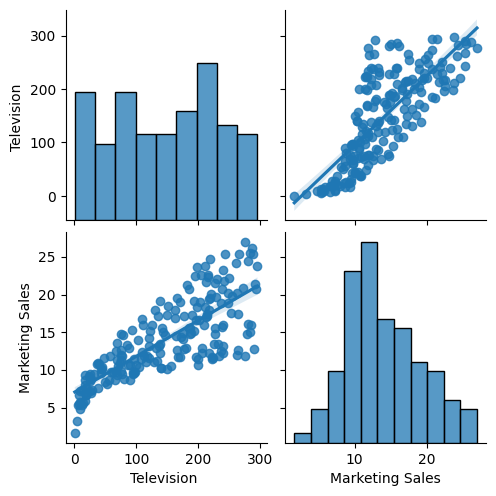

In [16]:
# See picture with scatter or plot method

# sns.lmplot(x="Salinity", y="Temperature", data=bottle_df, order=2, ci=None);
sns.pairplot(advertising_df, kind="reg")

In [17]:
# see how many null values we have

advertising_df.isnull().sum()

Television         0
Marketing Sales    0
dtype: int64

In [18]:
# Drop NaN or missing input numbers

advertising_df.fillna(method='ffill', inplace=True)
advertising_df.isnull().sum()

Television         0
Marketing Sales    0
dtype: int64

In [29]:
# Features chose
X = np.array(advertising_df['Television ']).reshape(-1, 2)
y = np.array(advertising_df['Marketing Sales']).reshape(-1, 2)

In [30]:
# Split data as %20 is test and %80 is train set

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 42)


In [31]:
model = Sequential()
model.add(Dense(64, input_dim=X_train.shape[1], activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(1))
optimizer = tf.keras.optimizers.RMSprop(0.001)
model.compile(loss='mse', optimizer=optimizer, metrics=['mae', 'mse'])


In [32]:
monitor = EarlyStopping(monitor='val_loss',patience=10,)
history=model.fit(X_train,y_train,validation_split=0.2,
          callbacks=[monitor],verbose=2,epochs=1000)

Epoch 1/1000
2/2 - 2s - loss: 331.2584 - mae: 16.4505 - mse: 331.2584 - val_loss: 91.5728 - val_mae: 8.1204 - val_mse: 91.5728 - 2s/epoch - 776ms/step
Epoch 2/1000
2/2 - 0s - loss: 60.2646 - mae: 6.4020 - mse: 60.2646 - val_loss: 28.7186 - val_mae: 4.5312 - val_mse: 28.7186 - 36ms/epoch - 18ms/step
Epoch 3/1000
2/2 - 0s - loss: 25.9947 - mae: 4.2085 - mse: 25.9947 - val_loss: 29.0213 - val_mae: 4.5689 - val_mse: 29.0213 - 39ms/epoch - 20ms/step
Epoch 4/1000
2/2 - 0s - loss: 25.6265 - mae: 4.1733 - mse: 25.6265 - val_loss: 28.7659 - val_mae: 4.5321 - val_mse: 28.7659 - 56ms/epoch - 28ms/step
Epoch 5/1000
2/2 - 0s - loss: 26.0569 - mae: 4.2364 - mse: 26.0569 - val_loss: 29.3170 - val_mae: 4.5406 - val_mse: 29.3170 - 49ms/epoch - 24ms/step
Epoch 6/1000
2/2 - 0s - loss: 25.5341 - mae: 4.1591 - mse: 25.5341 - val_loss: 30.5448 - val_mae: 4.7037 - val_mse: 30.5448 - 41ms/epoch - 20ms/step
Epoch 7/1000
2/2 - 0s - loss: 26.1242 - mae: 4.2134 - mse: 26.1242 - val_loss: 36.8173 - val_mae: 4.7789

In [33]:
def plot_history(history):
    hist = pd.DataFrame(history.history)
    hist['epoch'] = history.epoch

    plt.figure()
    plt.xlabel('Epoch')
    plt.ylabel('Mean Absolute Error [MPG]')
    plt.plot(hist['epoch'], hist['mae'], label='Train Error')
    plt.plot(hist['epoch'], hist['val_mae'], label='Validation Error')
    plt.ylim([0,5])
    plt.legend()

    plt.figure()
    plt.xlabel('Epoch')
    plt.ylabel('Mean Absolute Error [$MPG^2$]')
    plt.plot(hist['epoch'], hist['mae'], label='Train Error')
    plt.plot(hist['epoch'], hist['val_mae'], label='Validation Error')
    plt.ylim([0,20])
    plt.legend()

    plt.show()


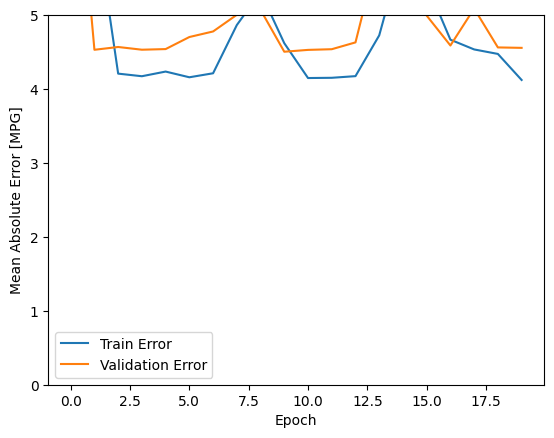

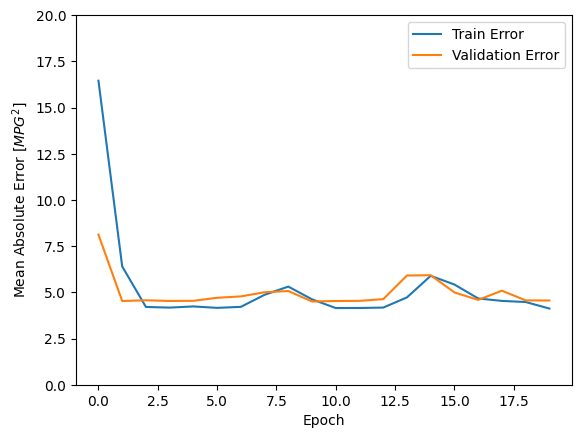

In [34]:
plot_history(history)

In [35]:
loss,mae,mse=model.evaluate(X_test,y_test)

1/1 [==============================] - 0s 25ms/step - loss: 22.9337 - mae: 3.9987 - mse: 22.9337
